# Obfuscation of Finger Prints: Fingerprint RE-ID 

## Background: 
With the growing widespread deployment of Automated Fingerprint Identification Systems (AFIS) in law enforcement applications, there is an ever-growing security threat to these systems. The threat to these systems is primarily through the means of physical fingerprint alteration or obfuscation to mask individual’s identity. In order to address this issue, security measures need to be created, that can ensure the detection, classification, and re-creation of altered fingerprints. Once the original print has been created, it can then be re ran through against the appropriate AFIS database and detect the identity match the print. This project is to demonstrate the use case of AWS services to solve this problem. This project will classify fingerprints samples with the following labels: Un-altered, Center Rotation, Obliteration, and Z-Cut and level of obstruction. Following this, it will attempt to match the fingerprint to the database. If the confidence score of the match is too low, then use the classifications to recover and predict the original print, and rematch. Once all of this is completed the information will be delivered to an end point for the AFIS software. 

## 1. Import Neccessary Libraries

In [1]:
import os
os.chdir('/home/ec2-user/SageMaker/2. Python Scripts')
from util import * 
import numpy as np

In [2]:
# Download Data Sets
#!aws s3 cp s3://zacbenson-csrp-socofing/ ./Data --recursive --quiet

## Data Set Information
The dataset that the models will be trained and tested on are is the Sokoto Conventry Fingerprint Data set (SOCOFing). SOCOFing data set contains 6000 fingerprints belonging to 600 African subjects. Although this dataset is limited to African subjects, the performance of these models should be unaffected when applied to fingerprints from other regions. This is because it still represents the three most common fingerprint patterns (whirl, ridge, and loop). However, this dataset could show a potential bias to fingerprints representing the loop pattern, due to this being the most common pattern universally. This labeled data set contains the following: 10 original samples per individual, systematically generated that meet the most common alternations (Central Rotation, Z-Cut, and Obliteration) at 3 levels of increasing alteration. Lastly this dataset states it is freely available for non-commercial research purposes that aligns with the scope of this project.

## Example of Original Prints

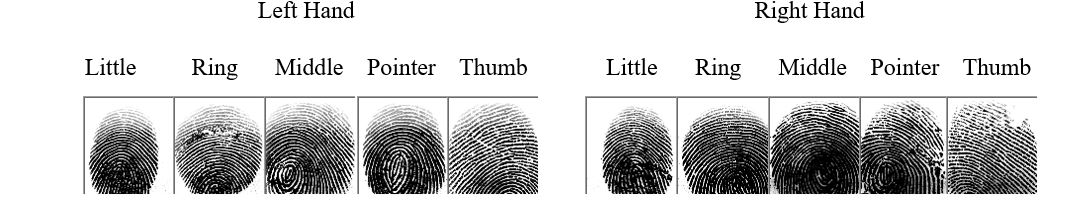

## Example of Generated Alterations

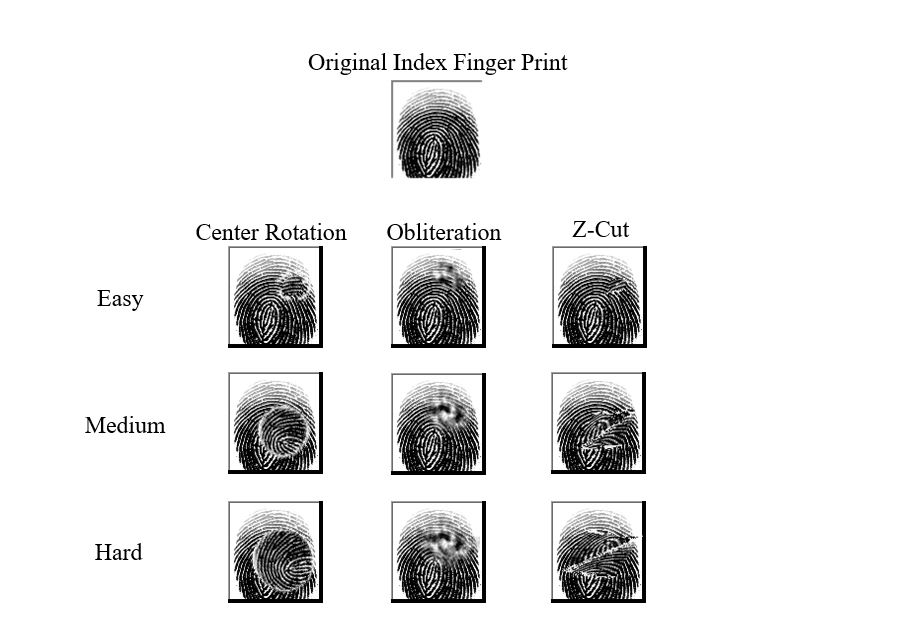

## 2. Select Random Image from test Data Set

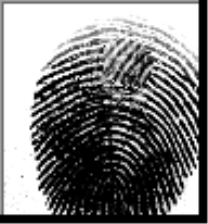

In [3]:
path = get_random_fingerprint()

Finger Print Selected for RE ID.

## 3. Determine if print is Altered

In [4]:
type_results = classify_obstruction_type(path)

Prediction: 
 Center Rotation:  0.9998948574066162 
 Obliferation:  8.861711103236303e-05 
 Real Finger Print:  8.141231774061453e-06 
 Z Cut:  8.498156603309326e-06 



## 4. Determine How Obstructed

In [5]:
level_results = classify_obstruction_level(path)

Prediction: 
 Slightly Altered:  0.9996848106384277 
 Moderately Altered:  1.724011895021249e-06 
 Severly Altered:  4.482790529891645e-07 
 Real Finger Print:  0.00031310642953030765 



## 5. Match with Original

In [6]:
id_results = id_fingerprint(path)

ValidationError: An error occurred (ValidationError) when calling the InvokeEndpoint operation: Endpoint ID-classification-model-ep--2021-06-29-14-48-09 of account 951232522638 not found.

## 6. Check Results

In [7]:
actual_labels = file_name_info(path)
predicted_labels =  best_predicitions(type_results, level_results, id_results)
print_answer_key(actual_labels, predicted_labels)

ID:  565
Obstruction:  Obl
Alteration Level:  easy
                   | Actual                       | Calculated                        | Confidence  
                ID |  565          |  99          |  0.284849613904953 
       Obstruction |  Obl          |  Obliferation          |  0.9999991655349731 
  Alteration Level |  easy          |  Slightly Altered          |  0.9995561242103577


## References
 - https://www.researchgate.net/publication/326681401_Sokoto_Coventry_Fingerprint_Dataset
 - https://github.com/gabehollombe-aws/jupyter-notebooks/blob/master/DL%20Intro%20Demo%20-%20Sagemaker%20Image%20Classifer%20via%20Transfer%20Learning.ipynb
 - http://biometrics.cse.msu.edu/Publications/Fingerprint/YoonFengJain_AlteredFP_AnalysisDetection_PAMI11_a.pdf

## Further reading
 - https://machinelearningmastery.com/one-shot-learning-with-siamese-networks-contrastive-and-triplet-loss-for-face-recognition/
 - https://github.com/SLongofono/FingerGAN

## Thank you!